# CORRELATION CHECK

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

In [2]:
path =r'Desktop/Data Sets/NYPD_S_Cleaned.pkl'
path_orig = r'Desktop/Data Sets'

In [5]:
df = pd.read_pickle(os.path.join(path))

In [6]:
df.head()

,ARREST_KEY,Law_Desc,Law_Cat,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Month,Year,Month_Year
0,236791704,Unknown,Unknown,Manhattan,28.0,0.0,45-64,M,BLACK,40.799009,-73.952409,Nov,2021.0,Nov 2021.0
1,237354740,RAPE 3,RAPE,Bronx,41.0,0.0,25-44,M,WHITE HISPANIC,40.816392,-73.895296,Dec,2021.0,Dec 2021.0
2,236081433,"CHILD, ENDANGERING WELFARE",SEX CRIMES,Queens,113.0,0.0,25-44,M,BLACK,40.679700,-73.776047,Nov,2021.0,Nov 2021.0
4,192799737,SEXUAL ABUSE,SEX CRIMES,Manhattan,25.0,0.0,45-64,M,BLACK,40.800694,-73.941109,Jan,2019.0,Jan 2019.0
5,193260691,Unknown,Unknown,Manhattan,14.0,0.0,25-44,M,UNKNOWN,40.757839,-73.991212,Feb,2019.0,Feb 2019.0


In [16]:
CT_B = pd.crosstab(df['ARREST_BORO'], df['Law_Cat'], dropna = False)

In [17]:
CT_B

Law_Cat,ABORTION,ADMINISTRATIVE CODE,ADMINISTRATIVE CODES,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,ALCOHOLIC BEVERAGE CONTROL LAW,ANTICIPATORY OFFENSES,ARSON,ASSAULT 3 & RELATED OFFENSES,BURGLAR'S TOOLS,BURGLARY,...,ROBBERY,SEX CRIMES,THEFT OF SERVICES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,UNAUTHORIZED USE OF A VEHICLE 3 (UUV),UNLAWFUL POSS. WEAP. ON SCHOOL,UNLAWFUL POSS. WEAP. ON SCHOOL GROUNDS,Unknown,VEHICLE AND TRAFFIC LAWS
ARREST_BORO,,,,,,,,,,,,,,,,,,,,,
Bronx,1,217,1,48,362,86,182,40004,346,3671,...,10555,3586,117,244,276,198,0,4,835,11064
Brooklyn,2,1303,15,56,905,55,204,38026,687,6848,...,13023,4283,86,357,500,428,0,4,490,12135
Manhattan,0,196,2,33,182,79,144,28016,1098,8396,...,10357,3434,409,752,228,264,1,1,1278,12111
Queens,1,359,7,44,278,15,132,32056,557,3933,...,8408,4497,182,556,526,456,0,2,463,11815
Staten Island,0,7,0,8,17,1,47,5619,43,674,...,1180,570,0,80,114,70,0,1,44,2886


In [23]:
CT_Y = pd.crosstab(df['Year'], ['Law_Cat'], dropna = False)

### inconstency that I can't place

In [20]:
CT_Y

col_0,Law_Cat
Year,
2006.0,250868
2007.0,571
2008.0,594
2009.0,577
2010.0,655
2011.0,692
2012.0,747
2013.0,673
2014.0,678


In [27]:
df.isnull().sum()

ARREST_KEY            0
Law_Desc              0
Law_Cat               0
ARREST_BORO           0
ARREST_PRECINCT       0
JURISDICTION_CODE     0
AGE_GROUP            62
PERP_SEX              0
PERP_RACE             0
Latitude              0
Longitude             0
Month                 0
Year                  0
Month_Year            0
dtype: int64

In [29]:
df['Year'].dtype 

dtype('O')

In [32]:
df['Year']= df['Year'].astype(float)

### I decided to just use the years 2018 and over for a more consitent check

In [37]:
df_2018= df[df['Year']>=2018.0]

In [38]:
df_2018['Year'].value_counts()

Year
2018.0    246773
2019.0    214617
2021.0    155507
2020.0    140413
Name: count, dtype: int64

In [39]:
df_2018.head()

,ARREST_KEY,Law_Desc,Law_Cat,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Month,Year,Month_Year
0,236791704,Unknown,Unknown,Manhattan,28.0,0.0,45-64,M,BLACK,40.799009,-73.952409,Nov,2021.0,Nov 2021.0
1,237354740,RAPE 3,RAPE,Bronx,41.0,0.0,25-44,M,WHITE HISPANIC,40.816392,-73.895296,Dec,2021.0,Dec 2021.0
2,236081433,"CHILD, ENDANGERING WELFARE",SEX CRIMES,Queens,113.0,0.0,25-44,M,BLACK,40.679700,-73.776047,Nov,2021.0,Nov 2021.0
4,192799737,SEXUAL ABUSE,SEX CRIMES,Manhattan,25.0,0.0,45-64,M,BLACK,40.800694,-73.941109,Jan,2019.0,Jan 2019.0
5,193260691,Unknown,Unknown,Manhattan,14.0,0.0,25-44,M,UNKNOWN,40.757839,-73.991212,Feb,2019.0,Feb 2019.0


## I had issues with the heat map so I decided to try to create cross tabs to gather numerical data

In [43]:
CT_Ye =pd.crosstab(df_2018['Year'], df_2018['ARREST_BORO'], dropna = False)

In [44]:
CT_Ye

ARREST_BORO,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Year,,,,,
2018.0,55446,68405,62582,49916,10424
2019.0,48815,58288,53915,44567,9032
2020.0,32724,38258,33255,29981,6195
2021.0,34018,41550,39677,33051,7211


In [53]:
df_corr = df_2018[['Year','Law_Cat','ARREST_BORO']]

## I was able to get this nice histogram

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Law_Cat', ylabel='Count'>

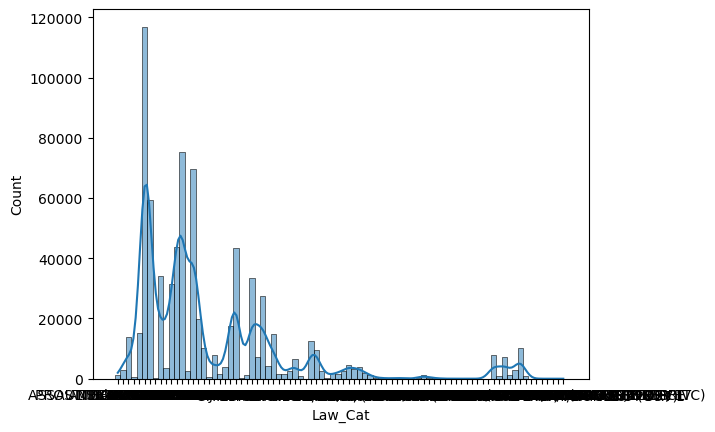

In [57]:
sns.histplot(df_2018['Law_Cat'], bins = 20, kde = True)

In [59]:
df_2018['Law_Cat'].value_counts()

Law_Cat
ASSAULT 3 & RELATED OFFENSES         116892
DANGEROUS DRUGS                       75404
PETIT LARCENY                         69629
FELONY ASSAULT                        59455
MISCELLANEOUS PENAL LAW               43846
                                      ...  
FELONY SEX CRIMES                         2
KIDNAPPING AND RELATED OFFENSES           2
DISRUPTION OF A RELIGIOUS SERVICE         2
UNLAWFUL POSS. WEAP. ON SCHOOL            1
LOITERING                                 1
Name: count, Length: 84, dtype: int64

In [60]:
df_2018['Law_Freq'] = df.groupby(['ARREST_KEY'])['Law_Cat'].transform(np.max)

/var/folders/ys/c00h737n045dn1bcd8vmxlrc0000gn/T/ipykernel_43152/3513607861.py:1: FutureWarning: The provided callable <function max at 0x1103898a0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_2018['Law_Freq'] = df.groupby(['ARREST_KEY'])['Law_Cat'].transform(np.max)
/var/folders/ys/c00h737n045dn1bcd8vmxlrc0000gn/T/ipykernel_43152/3513607861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Law_Freq'] = df.groupby(['ARREST_KEY'])['Law_Cat'].transform(np.max)


In [61]:
df_2018.head()

,ARREST_KEY,Law_Desc,Law_Cat,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Month,Year,Month_Year,Law_Freq
0,236791704,Unknown,Unknown,Manhattan,28.0,0.0,45-64,M,BLACK,40.799009,-73.952409,Nov,2021.0,Nov 2021.0,Unknown
1,237354740,RAPE 3,RAPE,Bronx,41.0,0.0,25-44,M,WHITE HISPANIC,40.816392,-73.895296,Dec,2021.0,Dec 2021.0,RAPE
2,236081433,"CHILD, ENDANGERING WELFARE",SEX CRIMES,Queens,113.0,0.0,25-44,M,BLACK,40.679700,-73.776047,Nov,2021.0,Nov 2021.0,SEX CRIMES
4,192799737,SEXUAL ABUSE,SEX CRIMES,Manhattan,25.0,0.0,45-64,M,BLACK,40.800694,-73.941109,Jan,2019.0,Jan 2019.0,SEX CRIMES
5,193260691,Unknown,Unknown,Manhattan,14.0,0.0,25-44,M,UNKNOWN,40.757839,-73.991212,Feb,2019.0,Feb 2019.0,Unknown


In [62]:
df_2018 = df_2018.drop(columns = ['Law_Freq'])

In [63]:
pd.options.display.max_rows = None

In [64]:
df_2018['Law_Cat'].value_counts()

Law_Cat
ASSAULT 3 & RELATED OFFENSES                   116892
DANGEROUS DRUGS                                 75404
PETIT LARCENY                                   69629
FELONY ASSAULT                                  59455
MISCELLANEOUS PENAL LAW                         43846
VEHICLE AND TRAFFIC LAWS                        43259
ROBBERY                                         34079
GRAND LARCENY                                   33545
DANGEROUS WEAPONS                               31473
CRIMINAL MISCHIEF & RELATED OF                  27502
BURGLARY                                        19968
OFFENSES AGAINST PUBLIC ADMINI                  17406
FORGERY                                         15074
INTOXICATED & IMPAIRED DRIVING                  14760
SEX CRIMES                                      13780
OFF. AGNST PUB ORD SENSBLTY &                   12560
CRIMINAL TRESPASS                               10248
CRIMINAL MISCHIEF & RELATED OFFENSES            10219
OTHER TRAFFIC INFRAC

## I then created a group by and decided to turn this in to data

In [74]:
df_2018.groupby('Law_Cat')['Law_Cat'].count()

Law_Cat
ABORTION                                            3
ADMINISTRATIVE CODE                              1940
ADMINISTRATIVE CODES                               23
AGRICULTURE & MRKTS LAW-UNCLASSIFIED              189
ALCOHOLIC BEVERAGE CONTROL LAW                   1516
ANTICIPATORY OFFENSES                             186
ARSON                                             458
ASSAULT 3 & RELATED OFFENSES                   116892
BURGLAR'S TOOLS                                  2476
BURGLARY                                        19968
CHILD ABANDONMENT/NON SUPPORT                      82
CHILD ABANDONMENT/NON SUPPORT 1                    20
CRIMINAL MISCHIEF & RELATED OF                  27502
CRIMINAL MISCHIEF & RELATED OFFENSES            10219
CRIMINAL TRESPASS                               10248
DANGEROUS DRUGS                                 75404
DANGEROUS WEAPONS                               31473
DISORDERLY CONDUCT                               1154
DISRUPTION OF A RELI

In [98]:
Grouped_Data= df_2018.groupby(['Year','ARREST_BORO','ARREST_PRECINCT','AGE_GROUP'])['ARREST_KEY'].count()

In [99]:
Grouped_Data

Year    ARREST_BORO    ARREST_PRECINCT  AGE_GROUP
2018.0  Bronx          40.0             18-24        1469
                                        25-44        3563
                                        45-64        1313
                                        65+            45
                                        Under 18      340
                       41.0             18-24         997
                                        25-44        1973
                                        45-64         574
                                        65+            27
                                        Under 18      177
                       42.0             18-24         911
                                        25-44        2134
                                        45-64         941
                                        65+            37
                                        Under 18      255
                       43.0             18-24        1161
                      

In [100]:
Df_new = Grouped_Data.reset_index()

### This is a new data set 

In [101]:
Df_new

,Year,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,ARREST_KEY
0,2018.0,Bronx,40.0,18-24,1469
1,2018.0,Bronx,40.0,25-44,3563
2,2018.0,Bronx,40.0,45-64,1313
3,2018.0,Bronx,40.0,65+,45
4,2018.0,Bronx,40.0,Under 18,340
5,2018.0,Bronx,41.0,18-24,997
6,2018.0,Bronx,41.0,25-44,1973
7,2018.0,Bronx,41.0,45-64,574
8,2018.0,Bronx,41.0,65+,27
9,2018.0,Bronx,41.0,Under 18,177


## Histogram

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ARREST_KEY', ylabel='Count'>

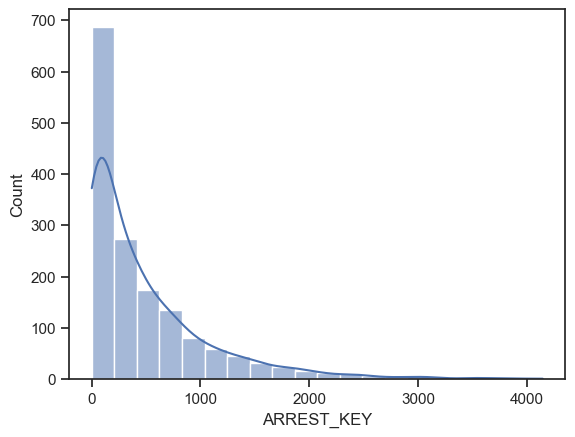

In [102]:
sns.histplot(Df_new['ARREST_KEY'], bins = 20, kde = True)

### I then created some more flags for numerical data

In [103]:
Df_new.loc[Df_new['ARREST_KEY'] < 500, 'Crime_Frequency'] = 'Low Frequency'
Df_new.loc[(Df_new['ARREST_KEY'] >= 500) & (Df_new['ARREST_KEY'] < 2000), 'Crime_Frequency'] = 'Mid Frequency'
Df_new.loc[Df_new['ARREST_KEY'] >= 2000, 'Crime_Frequency'] = 'High Frequency'

In [123]:
Df_new.loc[Df_new['AGE_GROUP'] =='18-24', 'Age_Code'] = 2
Df_new.loc[Df_new['AGE_GROUP'] =='25-44', 'Age_Code'] = 3
Df_new.loc[Df_new['AGE_GROUP'] =='45-64', 'Age_Code'] = 4
Df_new.loc[Df_new['AGE_GROUP'] =='65+', 'Age_Code'] = 5
Df_new.loc[Df_new['AGE_GROUP'] =='Under 18', 'Age_Code'] = 1


In [124]:
Df_new

,Year,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,ARREST_KEY,Crime_Frequency,Age_Code
0,2018.0,Bronx,40.0,18-24,1469,Mid Frequency,2.0
1,2018.0,Bronx,40.0,25-44,3563,High Frequency,3.0
2,2018.0,Bronx,40.0,45-64,1313,Mid Frequency,4.0
3,2018.0,Bronx,40.0,65+,45,Low Frequency,5.0
4,2018.0,Bronx,40.0,Under 18,340,Low Frequency,1.0
5,2018.0,Bronx,41.0,18-24,997,Mid Frequency,2.0
6,2018.0,Bronx,41.0,25-44,1973,Mid Frequency,3.0
7,2018.0,Bronx,41.0,45-64,574,Mid Frequency,4.0
8,2018.0,Bronx,41.0,65+,27,Low Frequency,5.0
9,2018.0,Bronx,41.0,Under 18,177,Low Frequency,1.0


## A very telling scatterplot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


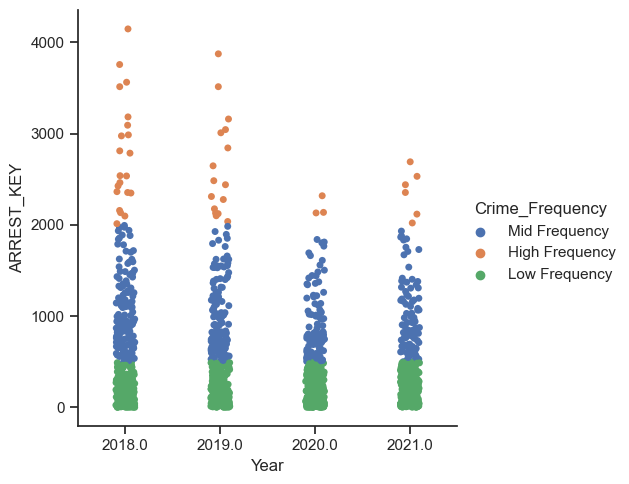

In [105]:
sns.set(style="ticks")
g = sns.catplot(x="Year", y="ARREST_KEY", hue="Crime_Frequency", data=Df_new)

## and a revealing HeatMap

In [131]:
df_corr = Df_new[['ARREST_KEY','ARREST_PRECINCT','Year','Age_Code']].corr() 

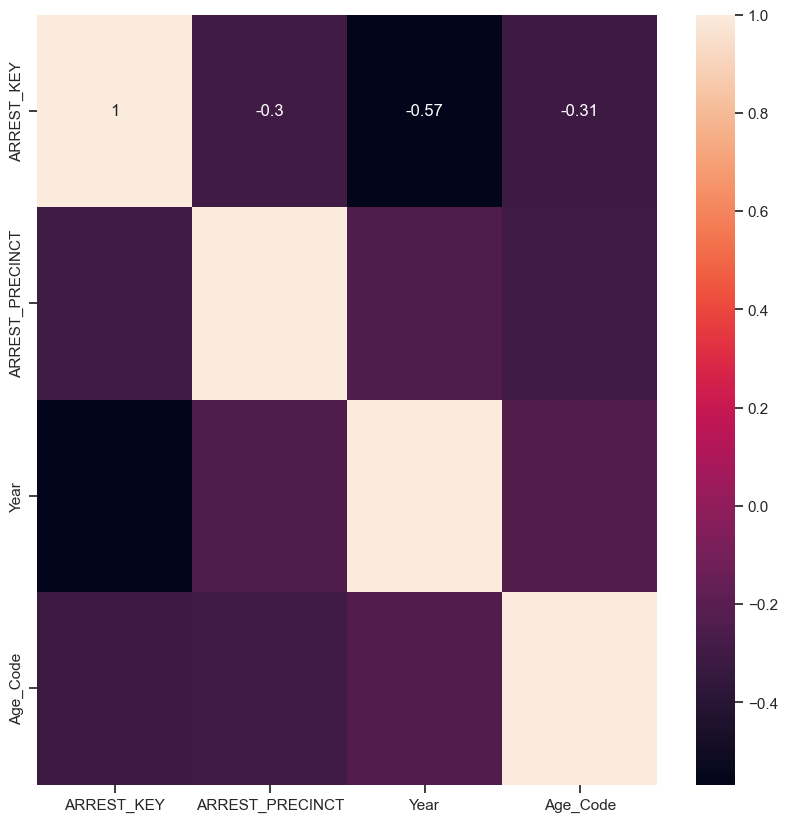

In [132]:
f,ax = plt.subplots(figsize=(10,10))


Heat_map= sns.heatmap(df_corr.corr(), annot = True, ax = ax) 

In [ ]:
## I see some correlation between Arrest precinct and Arrest KEY(Arrest Frequency
## I see no correlation between year and  ARREST KEY Amount but I do see correlation between Year and Precinct
## and Age code and year which could mean that the higher the year the higher the age of Arrests.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

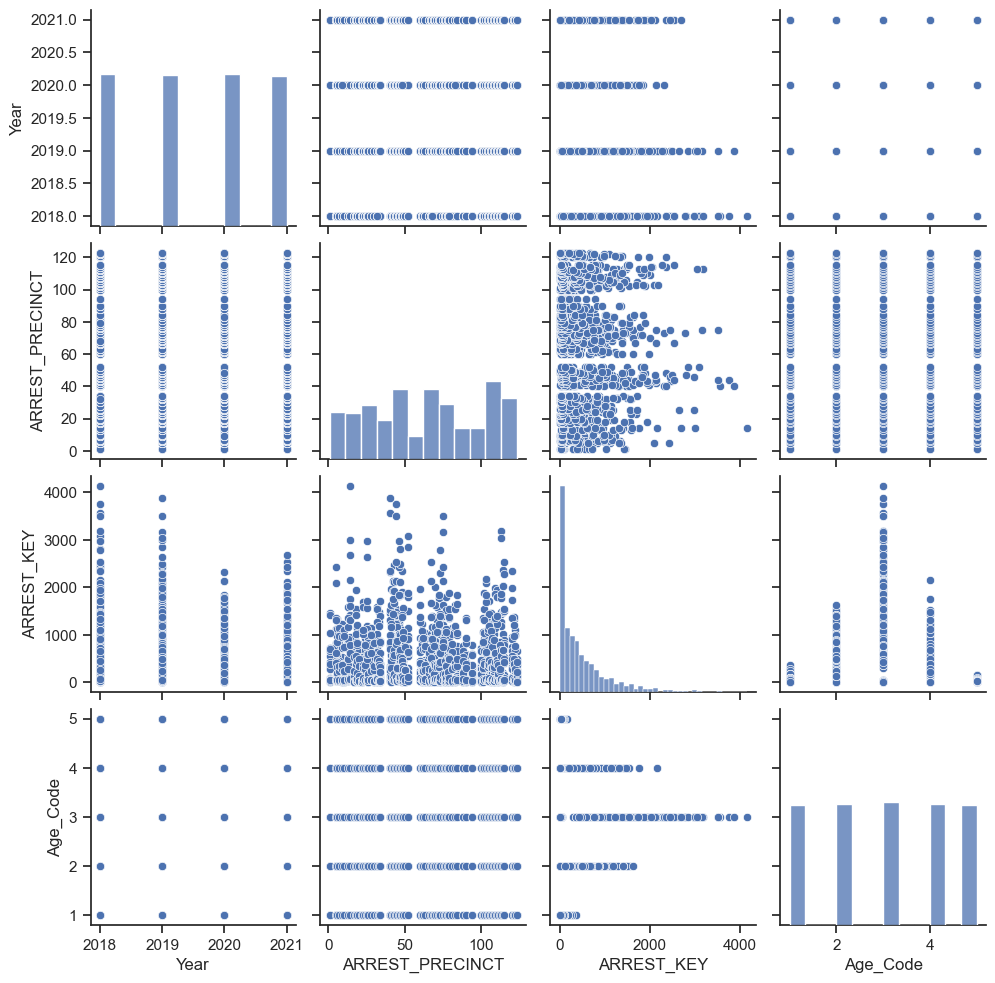

In [134]:
g = sns.pairplot(Df_new)

In [ ]:
## This pairplot also gave me a great analysis on how the variables operate.